<h2>Code-Beispiel: Bayessche Optimierung</h2>
<font size="3" face="Verdana">
<p style="text-align:justify">Im folgenden befindet sich eine interaktive Anwendung zur Veranschaulichung der Bayesschen Optimierung. </p>
<p style="text-align:justify">Dazu muss jedoch zuerst in die nachstehenden Code-Blöcke geklickt werden und diese durch drücken der "Run" Taste in der Leiste oben ausgeführt werden. Unter dem zweiten und dritten Codeblock erscheint dann ein Button. Durch Klicken auf den Button wird jeweils ein neuer Punkt zur Berechnung hinzugenommen und das aktuelle Modell der Funktion dargestellt.</p>
    <p>Hier wird die Bibliothek GPyOpt (<a href=https://github.com/SheffieldML/GPyOpt>https://github.com/SheffieldML/GPyOpt </a>) genutzt<sup>[1]</sup>.</p>
</font>

<h3>Gesuchte Funktion: </h3>

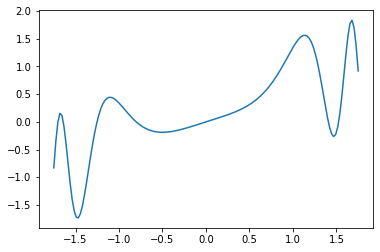

In [105]:
import GPy
import GPyOpt
import numpy as np
import math
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def gesuchteFunktion(x):
    return (math.sin(x**4) + 0.5*x)


#Zeige die gesuchte Funktion
x_werte = np.linspace(-1.75, 1.75, 150)
y_werte = []
for i in range(len(x_werte)):
    y_werte.append(gesuchteFunktion(x_werte[i]))
    
plt.plot(x_werte, y_werte)
plt.show()

<h3>Bayessche Optimierung mit Expected Improvement:</h3>

In [103]:

bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (-1.75,1.75)}]

myProblemEI = GPyOpt.methods.BayesianOptimization(gesuchteFunktion,bounds, acquisition_type='EI')

        
def interaktivesBeispiel1():
    myProblemEI.run_optimization(max_iter=1)
    myProblemEI.plot_acquisition()


im = interact_manual(interaktivesBeispiel1);
im.widget.children[0].description = 'Nächster Punkt'


interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

<h3>Bayessche Optimierung mit Maximum Probability of Improvement: </h3>

In [107]:
myProblemMPI = GPyOpt.methods.BayesianOptimization(gesuchteFunktion,bounds, acquisition_type='MPI')

        
def interaktivesBeispiel2():
    myProblemMPI.run_optimization(max_iter=1)
    myProblemMPI.plot_acquisition()



im = interact_manual(interaktivesBeispiel2);
im.widget.children[0].description = 'Nächster Punkt'

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

<p><sup>[1]</sup>  Copyright (c) 2015, the GPyOpt authors
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:
    * Redistributions of source code must retain the above copyright
      notice, this list of conditions and the following disclaimer.
    * Redistributions in binary form must reproduce the above copyright
      notice, this list of conditions and the following disclaimer in the
      documentation and/or other materials provided with the distribution.
    * Neither the name of the <organization> nor the
      names of its contributors may be used to endorse or promote products
      derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND
ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED
WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL <COPYRIGHT HOLDER> BE LIABLE FOR ANY
DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES
(INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES;
LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND
ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT
(INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS
SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.</p>